In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


images_path = []
import os
for dirname, _, filenames in os.walk('/kaggle/input/the-oxfordiiit-pet-dataset/'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        images_path.append(os.path.join(dirname, filename))


In [2]:
import re 
import cv2
from collections import Counter

def extract_breed_name(file_path):
    pattern = r"\/([^\/]+)_\d+\.jpg$"
    match = re.search(pattern, file_path)
    if match:
        return match.group(1)
    else:
        return None

In [3]:
breed_names = [extract_breed_name(file_path) for file_path in images_path]

# print(breed_names)

labels = breed_names

len(set(labels))


38

In [4]:
df = pd.DataFrame({'file_paths': images_path, 'labels': labels})
df.head(5)

file_paths  \
0  /kaggle/input/the-oxfordiiit-pet-dataset/image...   
1  /kaggle/input/the-oxfordiiit-pet-dataset/image...   
2  /kaggle/input/the-oxfordiiit-pet-dataset/image...   
3  /kaggle/input/the-oxfordiiit-pet-dataset/image...   
4  /kaggle/input/the-oxfordiiit-pet-dataset/image...   

                      labels  
0  american_pit_bull_terrier  
1                 leonberger  
2     english_cocker_spaniel  
3                    Siamese  
4                      boxer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14785 entries, 0 to 14784
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  14785 non-null  object
 1   labels      14779 non-null  object
dtypes: object(2)
memory usage: 231.1+ KB


In [6]:
df.describe()

file_paths  \
count                                               14785   
unique                                              14785   
top     /kaggle/input/the-oxfordiiit-pet-dataset/image...   
freq                                                    1   

                           labels  
count                       14779  
unique                         37  
top     american_pit_bull_terrier  
freq                          400

In [7]:
df['labels'].value_counts()

labels
american_pit_bull_terrier     400
beagle                        400
British_Shorthair             400
Maine_Coon                    400
Bengal                        400
japanese_chin                 400
shiba_inu                     400
wheaten_terrier               400
Persian                       400
leonberger                    400
great_pyrenees                400
pomeranian                    400
samoyed                       400
german_shorthaired            400
Ragdoll                       400
keeshond                      400
Bombay                        400
basset_hound                  400
chihuahua                     400
Birman                        400
english_cocker_spaniel        400
Siamese                       400
saint_bernard                 400
american_bulldog              400
Sphynx                        400
Egyptian_Mau                  400
english_setter                400
newfoundland                  400
pug                           400
yorkshi

In [8]:

# image_paths = df['file_paths'].tolist()
# images = []
# images_shape = []
# labels2 =[]

# for path in image_paths:
#     image = cv2.imread(path)
# #     print(image)

#     if image is None:
#         print('Error loading image')
#         continue
#     try:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image_reshaped = cv2.resize(image, (400,400))
#     except Exception as e:
#         print(f"Error resizing image: {e}")
#         continue
#     image_shape = image_reshaped.size
#     images.append(image_reshaped)
#     images_shape.append(image_shape)
#     labels2.append(extract_breed_name(path))

In [9]:
import tensorflow as tf
from keras.utils import load_img, img_to_array

image_paths = df['file_paths'].tolist()
images = []
labels2 =[]

img_size = (224, 224)

for path in image_paths:
    try:
        image = load_img(path, color_mode='rgb')
        image = tf.image.resize_with_pad(img_to_array(image, dtype = 'float32'), *img_size).numpy().astype('uint8')
    except Exception as e:
        print(f"Error resizing image: {e}")
        continue
    images.append(np.array(image))
    labels2.append(extract_breed_name(path))

2024-04-09 04:53:37.050857: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 04:53:37.051002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 04:53:37.234761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Error resizing image: cannot identify image file <_io.BytesIO object at 0x7b2a28488400>
Error resizing image: cannot identify image file <_io.BytesIO object at 0x7b2a2835fe20>
Error resizing image: cannot identify image file <_io.BytesIO object at 0x7b2a283c2e80>
Error resizing image: cannot identify image file <_io.BytesIO object at 0x7b2a2816f740>
Error resizing image: cannot identify image file <_io.BytesIO object at 0x7b2a281af060>
Error resizing image: cannot identify image file <_io.BytesIO object at 0x7b2a2821a020>


In [10]:
images_array = np.array(images)
images_array.shape

(14779, 224, 224, 3)

In [11]:
label_counts = Counter(labels2)
print(label_counts)


Counter({'american_pit_bull_terrier': 400, 'leonberger': 400, 'english_cocker_spaniel': 400, 'Siamese': 400, 'saint_bernard': 400, 'american_bulldog': 400, 'Sphynx': 400, 'Egyptian_Mau': 400, 'Birman': 400, 'english_setter': 400, 'newfoundland': 400, 'pug': 400, 'yorkshire_terrier': 400, 'Abyssinian': 400, 'havanese': 400, 'miniature_pinscher': 400, 'chihuahua': 400, 'basset_hound': 400, 'Bombay': 400, 'British_Shorthair': 400, 'Maine_Coon': 400, 'Bengal': 400, 'japanese_chin': 400, 'shiba_inu': 400, 'wheaten_terrier': 400, 'beagle': 400, 'Persian': 400, 'great_pyrenees': 400, 'pomeranian': 400, 'samoyed': 400, 'german_shorthaired': 400, 'Ragdoll': 400, 'keeshond': 400, 'Russian_Blue': 400, 'boxer': 399, 'scottish_terrier': 398, 'staffordshire_bull_terrier': 382})


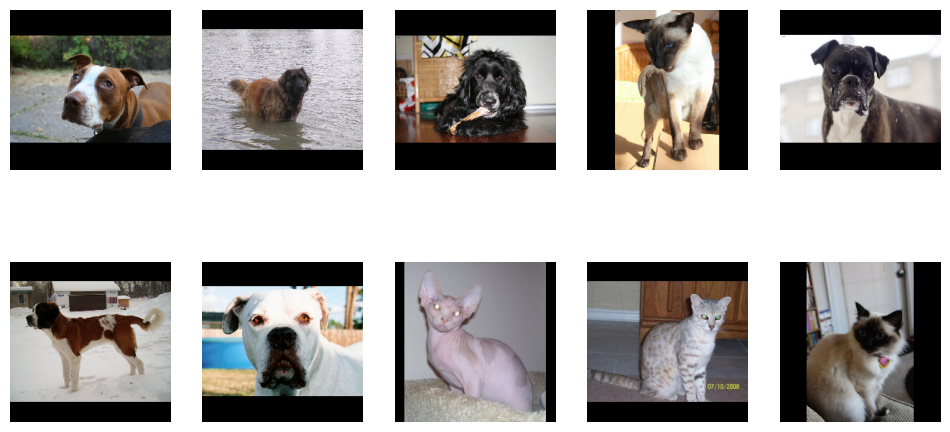

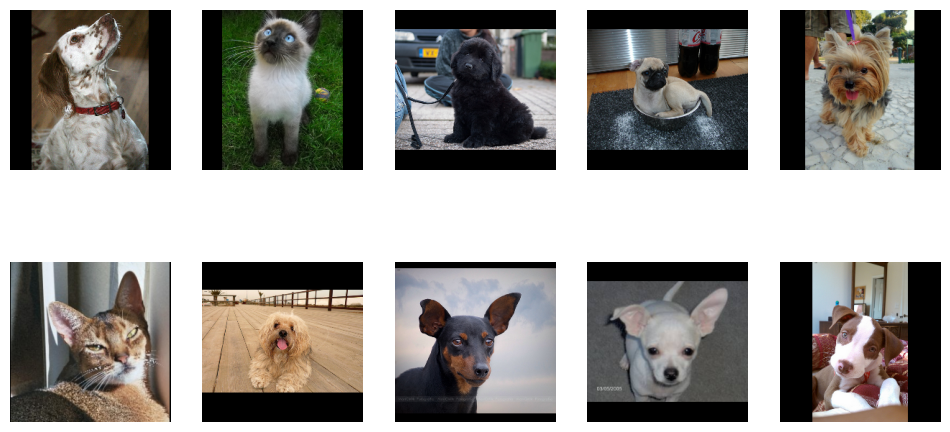

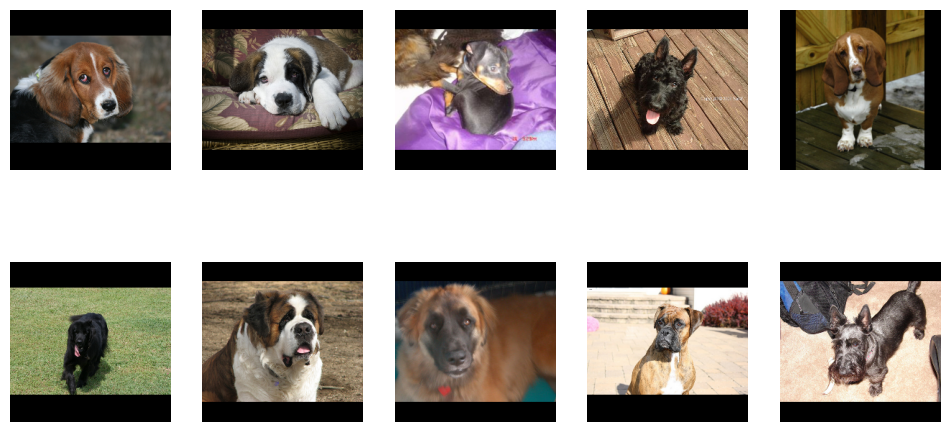

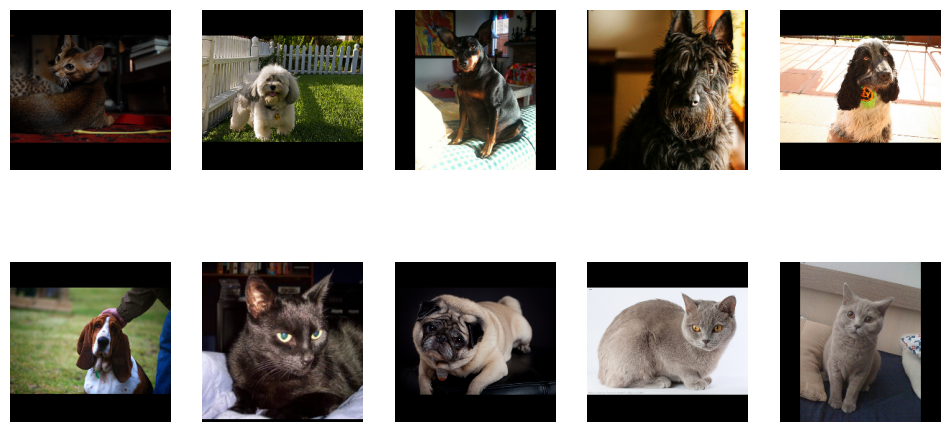

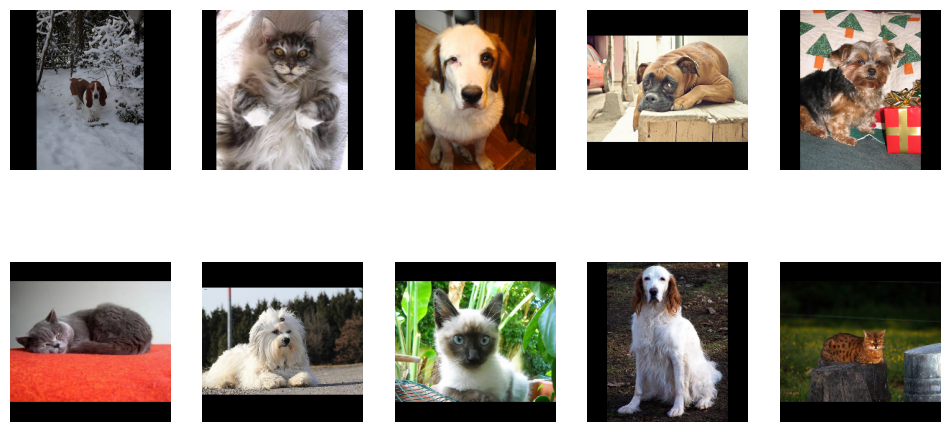

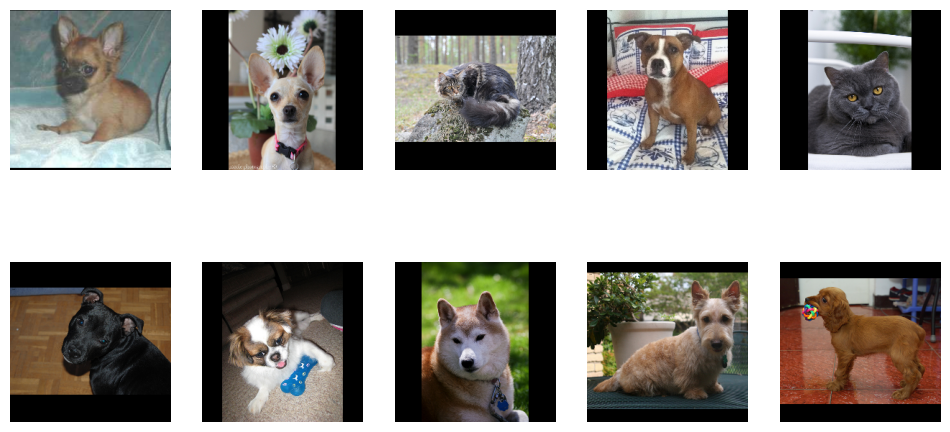

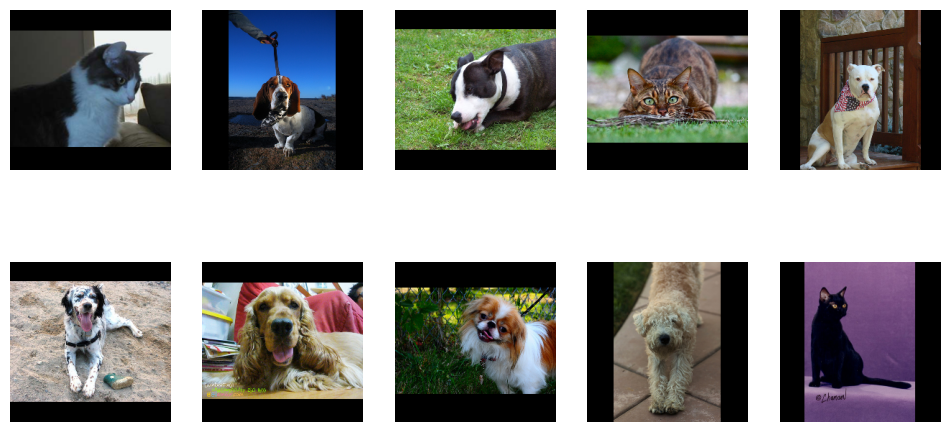

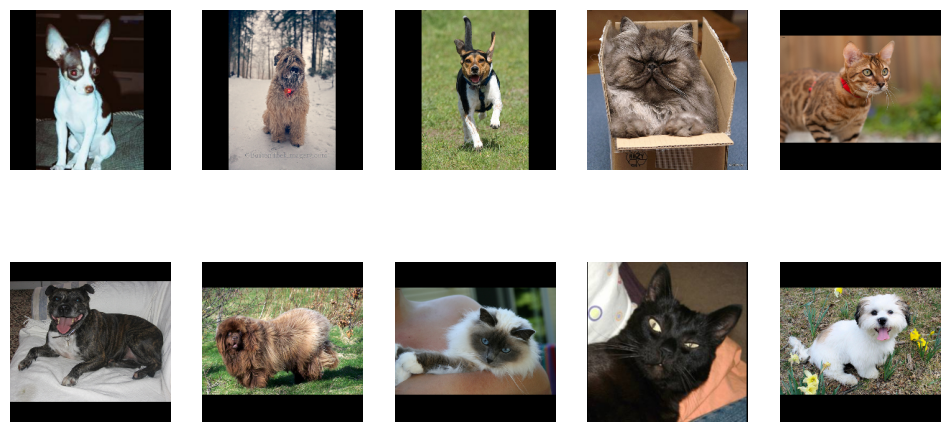

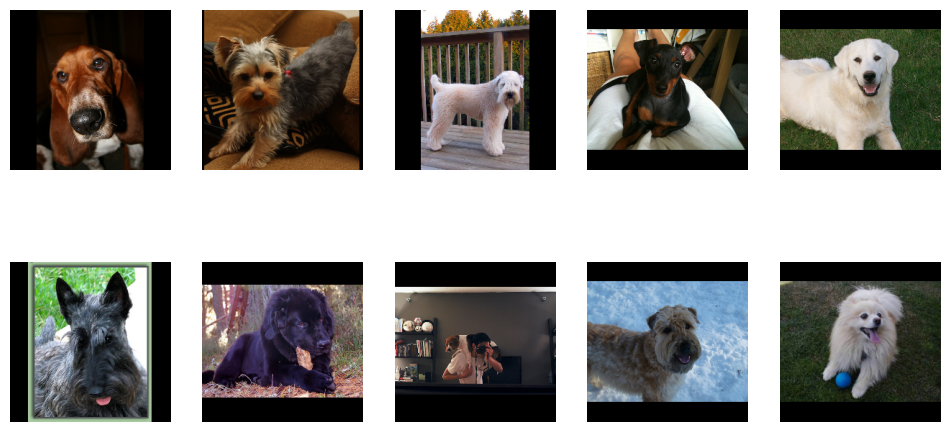

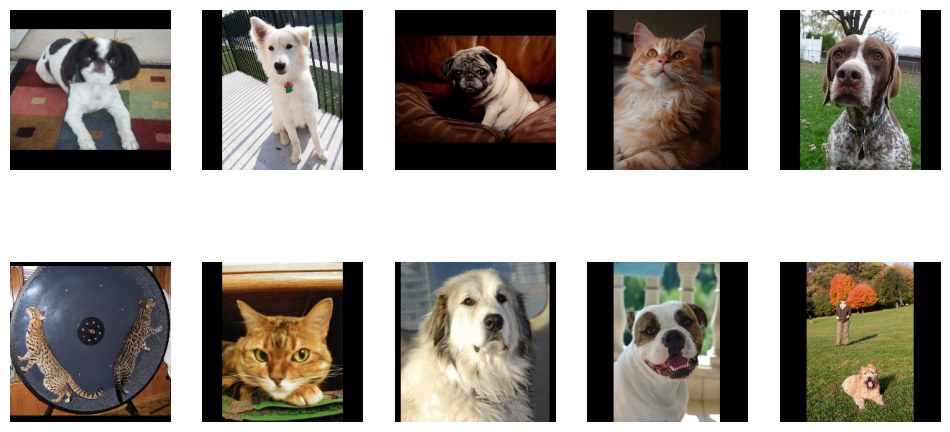

In [12]:
import matplotlib.pyplot as plt
num_images = 100
batch_size = 10

num_batches = num_images // batch_size

for i in range(num_batches):
    plt.figure(figsize=(12, 6))
    
    for j in range(batch_size):
        index = i * batch_size + j
        image_rgb = images[index]
        plt.subplot(2, 5, j+1)
        plt.imshow(image_rgb)
        plt.axis('off')
    plt.show()


In [13]:
images_array.shape, len(labels2)

((14779, 224, 224, 3), 14779)

Second 

In [14]:
# from sklearn.model_selection import train_test_split
# images, _ , labels, _ = train_test_split(images_array, labels2, stratify=labels2, test_size=0.9, random_state=42)

In [15]:
images = images_array

In [16]:
labels = labels2

In [17]:
images.shape

(14779, 224, 224, 3)

In [18]:
len(labels)

14779

In [19]:
np.save('/kaggle/working/labels_oxford.npy',labels)


In [20]:
np.save('/kaggle/working/images_oxford.npy', images)